In [1]:
!pip install  yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=335a9f9285adcabb6336742a1426aa9528a757616698e0cb25ad92eb49636291
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [12]:
TWTR = "TWTR" 

In [13]:
TWTR = yfinance.download(TWTR)

TWTR

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300
...,...,...,...,...,...,...
2020-08-13,37.430000,38.270000,37.369999,37.820000,37.820000,13259400
2020-08-14,37.740002,37.959999,37.279999,37.900002,37.900002,10377300
2020-08-17,37.950001,38.090000,37.270000,37.970001,37.970001,10188500


In [14]:
TWTR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300


In [15]:
TWTR.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-13,37.430000,38.270000,37.369999,37.820000,37.820000,13259400
2020-08-14,37.740002,37.959999,37.279999,37.900002,37.900002,10377300
2020-08-17,37.950001,38.090000,37.270000,37.970001,37.970001,10188500
2020-08-18,38.279999,38.459999,37.740002,38.009998,38.009998,8572500
2020-08-19,38.090000,39.520000,38.060001,38.889999,38.889999,17069500


In [16]:
TWTR.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1.707000e+03
mean,31.348149,31.942080,30.743374,31.327381,31.327381,2.193587e+07
std,11.516453,11.739850,11.253319,11.490367,11.490367,1.624828e+07
min,13.950000,14.220000,13.730000,14.010000,14.010000,4.107000e+06
25%,19.590000,19.985000,19.270000,19.630000,19.630000,1.305535e+07
50%,31.700001,32.380001,31.059999,31.650000,31.650000,1.766210e+07
75%,38.150002,38.965000,37.555000,38.139999,38.139999,2.490145e+07
max,72.879997,74.730003,69.129997,73.309998,73.309998,1.924153e+08


In [17]:
TWTR.info

<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002  117701600
2013-11-08  45.930000  46.939999  40.689999  41.650002  41.650002   27925300
2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   16113900
2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002    6316700
2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998    8688300
...               ...        ...        ...        ...        ...        ...
2020-08-13  37.430000  38.270000  37.369999  37.820000  37.820000   13259400
2020-08-14  37.740002  37.959999  37.279999  37.900002  37.900002   10377300
2020-08-17  37.950001  38.090000  37.270000  37.970001  37.970001   10188500
2020-08-18  38.279999  38.459999  37.740002  38.009998  38.009998    8572500
2020-08-19  38.090000  39.520000  38.060001 

In [18]:
TWTR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1707 entries, 2013-11-07 to 2020-08-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1707 non-null   float64
 1   High       1707 non-null   float64
 2   Low        1707 non-null   float64
 3   Close      1707 non-null   float64
 4   Adj Close  1707 non-null   float64
 5   Volume     1707 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 93.4 KB


In [19]:
import sqlite3

In [21]:
conn = sqlite3.connect("TWTR.db")
c = conn.cursor()

In [22]:
conn = sqlite3.connect("TWTR.db")
c = conn.cursor()

In [23]:
TWTR.to_sql("TWTR", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [24]:
#See data
c.execute("""SELECT * FROM TWTR""")
rows = c.fetchall()
rows

[('2013-11-07 00:00:00',
  45.099998474121094,
  50.09000015258789,
  44.0,
  44.900001525878906,
  44.900001525878906,
  117701600),
 ('2013-11-08 00:00:00',
  45.93000030517578,
  46.939998626708984,
  40.689998626708984,
  41.650001525878906,
  41.650001525878906,
  27925300),
 ('2013-11-11 00:00:00',
  40.5,
  43.0,
  39.400001525878906,
  42.900001525878906,
  42.900001525878906,
  16113900),
 ('2013-11-12 00:00:00',
  43.65999984741211,
  43.779998779296875,
  41.83000183105469,
  41.900001525878906,
  41.900001525878906,
  6316700),
 ('2013-11-13 00:00:00',
  41.029998779296875,
  42.869998931884766,
  40.7599983215332,
  42.599998474121094,
  42.599998474121094,
  8688300),
 ('2013-11-14 00:00:00',
  42.34000015258789,
  45.66999816894531,
  42.2400016784668,
  44.689998626708984,
  44.689998626708984,
  11099400),
 ('2013-11-15 00:00:00',
  45.25,
  45.27000045776367,
  43.43000030517578,
  43.97999954223633,
  43.97999954223633,
  8010600),
 ('2013-11-18 00:00:00',
  43.5,
  

In [25]:
TWTR.to_excel("TWTR.xls")

pd.read_excel("TWTR.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
1,2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300
...,...,...,...,...,...,...,...
1702,2020-08-13,37.430000,38.270000,37.369999,37.820000,37.820000,13259400
1703,2020-08-14,37.740002,37.959999,37.279999,37.900002,37.900002,10377300
1704,2020-08-17,37.950001,38.090000,37.270000,37.970001,37.970001,10188500
1705,2020-08-18,38.279999,38.459999,37.740002,38.009998,38.009998,8572500


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


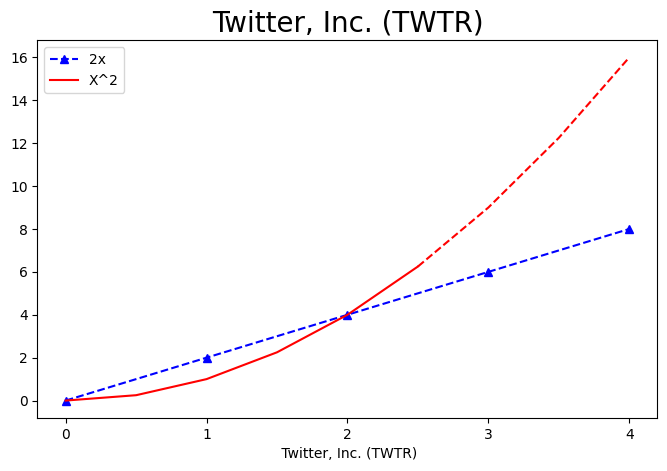

In [26]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Twitter, Inc. (TWTR)', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel(' Twitter, Inc. (TWTR)')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

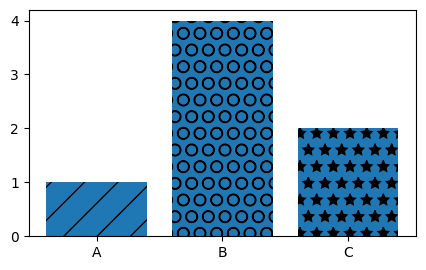

In [27]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()